In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

ImportError: this version of pandas is incompatible with numpy < 1.20.3
your numpy version is 1.19.5.
Please upgrade numpy to >= 1.20.3 to use this pandas version

In [2]:
df=pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")


In [3]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [4]:
df = df.drop(columns=['Customer ID'])

In [5]:
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    350 non-null    object 
 1   Age                       350 non-null    int64  
 2   City                      350 non-null    object 
 3   Membership Type           350 non-null    object 
 4   Total Spend               350 non-null    float64
 5   Items Purchased           350 non-null    int64  
 6   Average Rating            350 non-null    float64
 7   Discount Applied          350 non-null    bool   
 8   Days Since Last Purchase  350 non-null    int64  
 9   Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 25.1+ KB


In [7]:
df.isnull()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
345,False,False,False,False,False,False,False,False,False,False
346,False,False,False,False,False,False,False,False,False,False
347,False,False,False,False,False,False,False,False,False,False
348,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [9]:
df['Satisfaction Level'].value_counts()

Satisfaction Level
Satisfied      125
Unsatisfied    116
Neutral        107
Name: count, dtype: int64

In [10]:
df["Satisfaction Level"].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied', nan], dtype=object)

In [11]:
df = df.dropna(subset=['Satisfaction Level']).reset_index(drop=True)


In [12]:
df.isnull().sum()

Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [13]:
satisfaction_counts = df['Satisfaction Level'].value_counts()

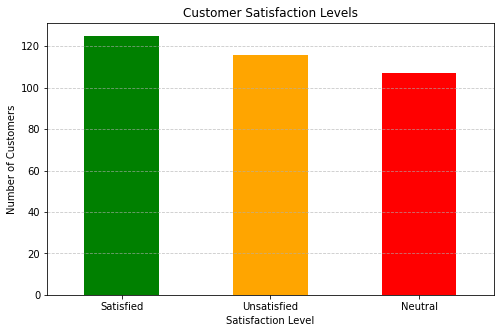

In [14]:
plt.figure(figsize=(8,5))
satisfaction_counts.plot(kind='bar', color=['green', 'orange', 'red'])

plt.title('Customer Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [15]:
df.select_dtypes(include=['object'])

,Gender,City,Membership Type,Satisfaction Level
0,Female,New York,Gold,Satisfied
1,Male,Los Angeles,Silver,Neutral
2,Female,Chicago,Bronze,Unsatisfied
3,Male,San Francisco,Gold,Satisfied
4,Male,Miami,Silver,Unsatisfied
...,...,...,...,...
343,Male,Miami,Silver,Unsatisfied
344,Female,Houston,Bronze,Neutral
345,Female,New York,Gold,Satisfied
346,Male,Los Angeles,Silver,Neutral


In [16]:
string_columns = df.select_dtypes(include=['object'])
string_columns_cat = df.select_dtypes(include=['object', 'category'])

In [17]:
string_columns.columns.tolist()

['Gender', 'City', 'Membership Type', 'Satisfaction Level']

In [18]:
for col in string_columns.columns:
    print(f"\nBefore Unique values in {col}:")
    print(df[col].unique())



Before Unique values in Gender:
['Female' 'Male']

Before Unique values in City:
['New York' 'Los Angeles' 'Chicago' 'San Francisco' 'Miami' 'Houston']

Before Unique values in Membership Type:
['Gold' 'Silver' 'Bronze']

Before Unique values in Satisfaction Level:
['Satisfied' 'Neutral' 'Unsatisfied']


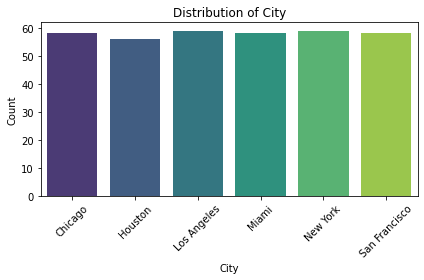

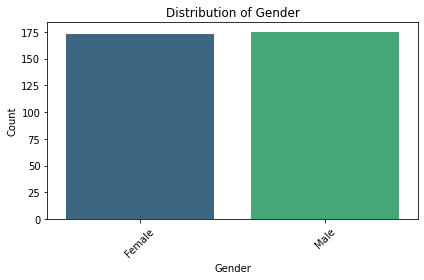

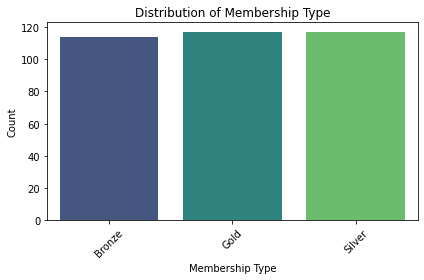

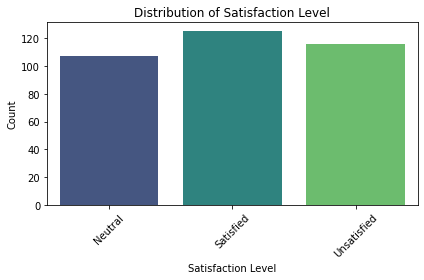

In [19]:

for col in sorted(string_columns_cat.columns.tolist()):
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=sorted(df[col].unique()), palette='viridis') 
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [20]:
le = LabelEncoder()

for col in string_columns.columns:
    df[col] = le.fit_transform(df[col])


In [21]:
df.select_dtypes(include=['object'])

""
0
1
2
3
4
...
343
344
345
346


In [22]:
for col in string_columns.columns:
    print(f"\nAfter Unique values in {col} :")
    print(df[col].unique())



After Unique values in Gender :
[0 1]

After Unique values in City :
[4 2 0 5 3 1]

After Unique values in Membership Type :
[1 2 0]

After Unique values in Satisfaction Level :
[1 0 2]


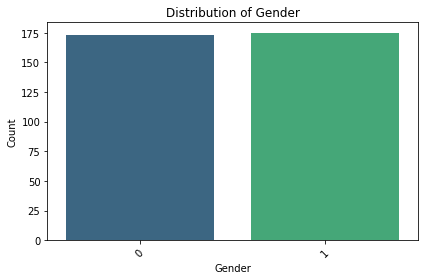

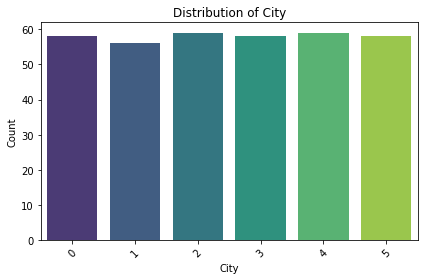

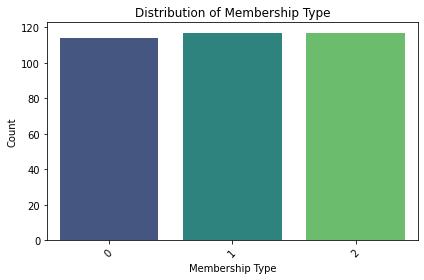

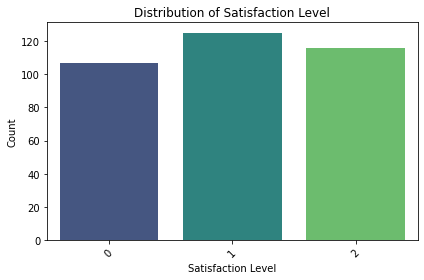

In [23]:
for col in string_columns_cat:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [24]:
bool_columns = df.select_dtypes(include=['bool'])

bool_columns.head()

,Discount Applied
0,True
1,False
2,True
3,False
4,True


In [25]:
print(bool_columns.columns.tolist())

['Discount Applied']


In [26]:
for col in bool_columns.columns:
    df[col] = df[col].astype(int)

print(df.dtypes)


Gender                        int32
Age                           int64
City                          int32
Membership Type               int32
Total Spend                 float64
Items Purchased               int64
Average Rating              float64
Discount Applied              int32
Days Since Last Purchase      int64
Satisfaction Level            int32
dtype: object


In [27]:
df = df.astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    348 non-null    float64
 1   Age                       348 non-null    float64
 2   City                      348 non-null    float64
 3   Membership Type           348 non-null    float64
 4   Total Spend               348 non-null    float64
 5   Items Purchased           348 non-null    float64
 6   Average Rating            348 non-null    float64
 7   Discount Applied          348 non-null    float64
 8   Days Since Last Purchase  348 non-null    float64
 9   Satisfaction Level        348 non-null    float64
dtypes: float64(10)
memory usage: 27.3 KB


In [29]:
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,0.0,29.0,4.0,1.0,1120.20,14.0,4.6,1.0,25.0,1.0
1,1.0,34.0,2.0,2.0,780.50,11.0,4.1,0.0,18.0,0.0
2,0.0,43.0,0.0,0.0,510.75,9.0,3.4,1.0,42.0,2.0
3,1.0,30.0,5.0,1.0,1480.30,19.0,4.7,0.0,12.0,1.0
4,1.0,27.0,3.0,2.0,720.40,13.0,4.0,1.0,55.0,2.0
...,...,...,...,...,...,...,...,...,...,...
343,1.0,32.0,3.0,2.0,660.30,10.0,3.8,1.0,42.0,2.0
344,0.0,36.0,1.0,0.0,470.50,8.0,3.0,0.0,27.0,0.0
345,0.0,30.0,4.0,1.0,1190.80,16.0,4.5,1.0,28.0,1.0
346,1.0,34.0,2.0,2.0,780.20,11.0,4.2,0.0,21.0,0.0


In [30]:
# df.to_csv("TEST.csv", index=False)

In [31]:
X = df.drop(columns=['Satisfaction Level']) 
y = df['Satisfaction Level']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (348, 9)
y shape: (348,)


## Model1 - Kmeans with GMM  with pca

In [1]:
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scale = scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_scale = pca.fit_transform(X)

ModuleNotFoundError: No module named 'sklearn'

In [33]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


In [34]:
n_clusters = 3 

km = KMeans(n_clusters=n_clusters, random_state=42)
km.fit(X_scale)
initial_means = km.cluster_centers_

print(silhouette_score(X_scale, km.labels_))

0.7541416758856544


In [35]:
gmm = GaussianMixture(n_components=n_clusters, means_init=initial_means, random_state=42)
gmm.fit(X_scale)

print(gmm.bic(X_scale))

7360.901224198671


In [36]:
with open("hybrid_pca_kmeans_model.pkl", "wb") as f:
    pickle.dump(km, f)
    
with open("pca_model.pkl", "wb") as f:
    pickle.dump(pca, f)

In [37]:
pickle.load(open("hybrid_pca_kmeans_model.pkl", "rb"))


KMeans(n_clusters=3, random_state=42)

In [38]:
pickle.load(open("pca_model.pkl", "rb"))

PCA(n_components=2)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

pca = PCA(n_components=5)  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [41]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
initial_means_ = kmeans.cluster_centers_

y_pred = kmeans.predict(X_test)  

print(silhouette_score(X_train, kmeans.labels_))


0.7534243820153601


In [42]:
gmm = GaussianMixture(n_components=3, means_init=initial_means_, random_state=42)
gmm.fit(X_train)
y_pred_gmm = gmm.predict(X_test)

print(gmm.bic(X_train))

5720.508699201373


KMeans Classification Report:
              precision    recall  f1-score   support

     Neutral       0.54      0.52      0.53        25
   Satisfied       1.00      1.00      1.00        26
 Unsatisfied       0.40      0.42      0.41        19

    accuracy                           0.67        70
   macro avg       0.65      0.65      0.65        70
weighted avg       0.67      0.67      0.67        70

Accuracy of KMeans: 0.67


Text(69.0, 0.5, 'True')

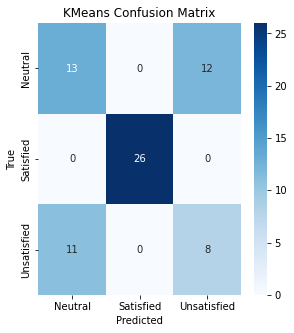

In [43]:
cm = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred, target_names=le.classes_)

accuracy_kmeans = accuracy_score(y_test, y_pred)

print("KMeans Classification Report:")
print(report)
print(f"Accuracy of KMeans: {accuracy_kmeans:.2f}")


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("KMeans Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')



GMM Classification Report:
              precision    recall  f1-score   support

     Neutral       0.57      0.52      0.54        25
   Satisfied       0.96      1.00      0.98        26
 Unsatisfied       0.40      0.42      0.41        19

    accuracy                           0.67        70
   macro avg       0.64      0.65      0.64        70
weighted avg       0.67      0.67      0.67        70

Accuracy of GMM: 0.67


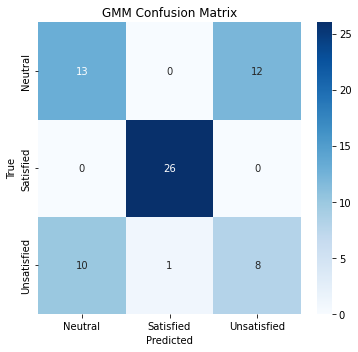

In [44]:

cm_gmm = confusion_matrix(y_test, y_pred_gmm)

report_gmm = classification_report(y_test, y_pred_gmm, target_names=le.classes_)

accuracy_gmm = accuracy_score(y_test, y_pred_gmm)

print("\nGMM Classification Report:")
print(report_gmm)
print(f"Accuracy of GMM: {accuracy_gmm:.2f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
sns.heatmap(cm_gmm, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("GMM Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

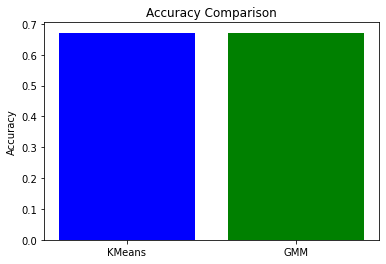

In [45]:

plt.figure(figsize=(6, 4))
algorithms = ['KMeans', 'GMM']
accuracies = [accuracy_kmeans, accuracy_gmm]
plt.bar(algorithms, accuracies, color=['blue', 'green'])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

## MODEL 2 MLP -(MultiLayer  Perceptron) with standardscaler

New2

In [46]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_categorical = to_categorical(y)



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)


In [48]:

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 classes/labels: Neutral, Satisfied, Unsatisfied
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 9

In [50]:
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30


14/14 [==============================] - 7s 195ms/step - loss: 1.1141 - accuracy: 0.3560 - val_loss: 0.7676 - val_accuracy: 0.9643
Epoch 2/30
14/14 [==============================] - 0s 3ms/step - loss: 0.7586 - accuracy: 0.7508 - val_loss: 0.4371 - val_accuracy: 0.9643
Epoch 3/30
14/14 [==============================] - 0s 4ms/step - loss: 0.4882 - accuracy: 0.9440 - val_loss: 0.2278 - val_accuracy: 0.9643
Epoch 4/30
14/14 [==============================] - 0s 4ms/step - loss: 0.3006 - accuracy: 0.9611 - val_loss: 0.1257 - val_accuracy: 0.9643
Epoch 5/30
14/14 [==============================] - 0s 4ms/step - loss: 0.1873 - accuracy: 0.9808 - val_loss: 0.0935 - val_accuracy: 0.9643
Epoch 6/30
14/14 [==============================] - 0s 4ms/step - loss: 0.1538 - accuracy: 0.9567 - val_loss: 0.0857 - val_accuracy: 0.9643
Epoch 7/30
14/14 [==============================] - 0s 4ms/step - loss: 0.1282 - accuracy: 0.9685 - val_loss: 0.0775 - val_accuracy: 0.9643
Epoch 8/30
14/14 [===========

In [51]:
loss, accuracy = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000


In [52]:
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


In [53]:
import joblib

model.save('customer_satisfaction_model.h5')
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)

['scaler.pkl']

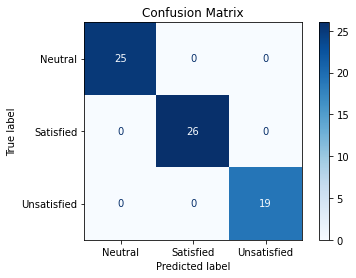


📝 Classification Report:

              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00        25
   Satisfied       1.00      1.00      1.00        26
 Unsatisfied       1.00      1.00      1.00        19

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



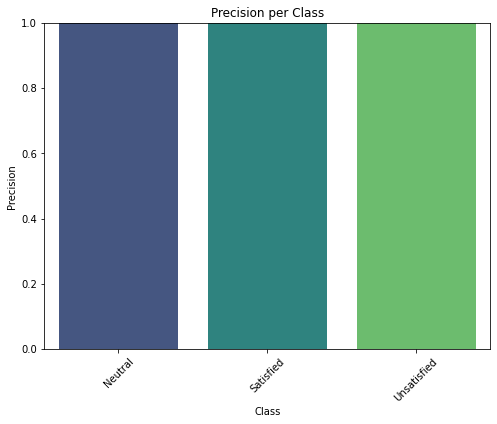

In [54]:

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Neutral", "Satisfied", "Unsatisfied"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_true, y_pred, target_names=["Neutral", "Satisfied", "Unsatisfied"], output_dict=True)
print("\n📝 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Neutral", "Satisfied", "Unsatisfied"]))

report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,6))
sns.barplot(x=report_df.index[:-3], y=report_df['precision'][:-3], palette="viridis")
plt.title('Precision per Class')
plt.ylabel('Precision')
plt.xlabel('Class')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

